## Assignment 9

In this assignment, **pretrained neural networks** trained on IMAGENET are used.  
The goal is to correctly identify the breed of a pictured dog.  
A dog is considered to be identified correctly if its actual breed is amongst the top5 predictions of the classifier.  
Disclaimer: They are all good boys!

### Introduction 

Classification neural networks are supervised machine learning algorithms.  
A pre-trained model has been previously trained on a dataset and contains the weights and biases that represent the features of whichever dataset it was trained on. Many such models are available for free to be used for transfer learning.
 
Here, three such models are used:
* ResNet50
* Inception ResNet V2
* NASNet (Large)

In [1]:
# !pip install opencv-python
# !pip install tensorflow

In [15]:
import numpy as np 
# import ast
# import tensorflow as tf 
from tensorflow.keras.applications.inception_resnet_v2 import decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications import NASNetLarge
import glob
import cv2
import matplotlib.pyplot as plt

In [6]:
# load all the images
images = [cv2.imread(file) for file in glob.iglob('**/*.jpg', recursive=True)]

In [22]:
# preprocess the images according to the input layer of each network
def process_img(image: np.ndarray, network: str) -> np.ndarray:
    if network == 'ResNet50':
        im_resized_scaled = cv2.resize(image, (224, 224))/255
    elif network == 'InceptionResNetV2':
        im_resized_scaled = cv2.resize(image, (299, 299))/255
    elif network == 'NASNetLarge':
        im_resized_scaled = cv2.resize(image, (331, 311))/255
    else:
        raise ValueError('Network should be one of "ResNet50", "InceptionResNetV2", "NASNetLarge"')
    
    im = im_resized_scaled[np.newaxis, ...]
    return im

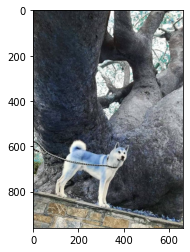

In [21]:
plt.imshow(im)

In [25]:
im_res = im_resized_scaled[np.newaxis, ...]

y_pred = res.predict(im_res)
decode_predictions(y_pred, top=5)
print('\n'.join([prediction[1] for prediction in decode_predictions(y_pred, top=5)[0]]))

[('n01930112', 'nematode', 0.12385244), ('n03041632', 'cleaver', 0.03936546), ('n03838899', 'oboe', 0.02678654), ('n02783161', 'ballpoint', 0.026758429), ('n03729826', 'matchstick', 0.025957873)]


In [7]:
im_resized_scaled = cv2.resize(im, (299, 299))/255
im_res = im_resized_scaled[np.newaxis, ...]

y_pred = incres.predict(im_res)
decode_predictions(y_pred, top=5)

NameError: name 'incres' is not defined

In [12]:
im_resized_scaled = cv2.resize(im, (331, 331))/255
im_res = im_resized_scaled[np.newaxis, ...]

y_pred = nas.predict(im_res)
decode_predictions(y_pred, top=5)

[[('n02091467', 'Norwegian_elkhound', 0.7669886),
  ('n02110185', 'Siberian_husky', 0.062891856),
  ('n02109961', 'Eskimo_dog', 0.052679826),
  ('n02110063', 'malamute', 0.009597415),
  ('n02110958', 'pug', 0.004983843)]]

Tutorials followed:  
[OpenCV](https://www.tutorialkart.com/opencv/python/)  
[AnalyticsVidhya - Transfer Learning](https://www.analyticsvidhya.com/blog/2017/06/transfer-learning-the-art-of-fine-tuning-a-pre-trained-model/#:~:text=Simply%20put%2C%20a%20pre%2Dtrained,build%20a%20self%20learning%20car.)